#### 범죄/안전 -> 교통사고 사망자수

#### 주야별 교통사고 - 사망자수
* 2021년, 주야 사망자수 평균 차이가 있는가. (주간, 야간 95% ci : mean+-1.96*std)
* 2011 ~ 2021년, 월별 차이가 있는가

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

In [49]:
data_file = '주야별_교통사고_20230320214412.csv'
pd_data = pd.read_csv(data_file, encoding = 'cp949', header = [0,1,2]) # death_2021[2:, :]
death_2021 = pd_data.to_numpy()
print(death_2021)

[['1월' 107 90]
 ['2월' 107 96]
 ['3월' 128 81]
 ['4월' 119 93]
 ['5월' 154 101]
 ['6월' 124 103]
 ['7월' 139 115]
 ['8월' 129 118]
 ['9월' 131 115]
 ['10월' 156 156]
 ['11월' 163 122]
 ['12월' 149 120]]


In [50]:
def do_mean_comparison(g1, g2):
    print('***************')
    print('g1 shaprio: ', stats.shapiro(g1))
    print('g2 shaprio: ', stats.shapiro(g2))
    print('levene: ', stats.levene(g1, g2))
    print('ttest_ind:', stats.ttest_ind(g1, g2))
    print('***************')
    
def get_95ci(vals):
    vals_mean = np.mean(vals)
    vals_std = np.std(vals)
    
    print(vals_mean - 1.96*vals_std, ' ~ ', vals_mean, ' ~ ', vals_mean + 1.96*vals_std)

In [51]:
# 2021년, 주야 사망자수 평균 차이가 있는가. (주간, 야간 95% ci : mean+-1.96*std)

death_2021_day = death_2021[:, 1].astype(np.int64) # 주간사망자 수 
death_2021_night = death_2021[:, 2].astype(np.int64) # 야간사망자 수 

# 주간, 야간 2021년 사망자 수 평균 
print('day:', np.mean(death_2021_day))
print('night:', np.mean(death_2021_night))

do_mean_comparison(death_2021_day, death_2021_night)

get_95ci(death_2021_day)
get_95ci(death_2021_night)

day: 133.83333333333334
night: 109.16666666666667
***************
g1 shaprio:  ShapiroResult(statistic=0.9471257328987122, pvalue=0.5954179763793945)
g2 shaprio:  ShapiroResult(statistic=0.9238178730010986, pvalue=0.31914660334587097)
levene:  LeveneResult(statistic=0.005013673655423849, pvalue=0.9441908530585174)
ttest_ind: Ttest_indResult(statistic=3.139325802166223, pvalue=0.004765481867654835)
***************
98.82813816334624  ~  133.83333333333334  ~  168.83852850332045
71.97110838942669  ~  109.16666666666667  ~  146.36222494390665


In [52]:
# 2011 ~ 2021년, 월별 차이가 있는가
datafile = '주야별_교통사고_20230320214655.csv'
pd_data1 = pd.read_csv(datafile, encoding = 'cp949')
death_2011_2021 = pd_data1.to_numpy()
death_2011_2021 = death_2011_2021[1:, :]
print(death_2011_2021)

[['2011' '주' '186' '156' '143' '182' '185' '202' '225' '227' '217' '233'
  '228' '250']
 ['2011' '야' '209' '183' '195' '247' '208' '213' '237' '245' '257' '287'
  '286' '228']
 ['2012' '주' '206' '194' '179' '233' '218' '238' '198' '193' '233' '261'
  '238' '196']
 ['2012' '야' '212' '199' '224' '250' '226' '238' '218' '216' '253' '272'
  '270' '227']
 ['2013' '주' '190' '136' '198' '164' '215' '195' '221' '192' '211' '236'
  '223' '209']
 ['2013' '야' '199' '199' '211' '216' '205' '241' '223' '220' '219' '263'
  '256' '250']
 ['2014' '주' '189' '150' '153' '153' '226' '185' '196' '183' '200' '223'
  '249' '209']
 ['2014' '야' '200' '175' '205' '188' '172' '182' '211' '176' '245' '247'
  '227' '218']
 ['2015' '주' '174' '129' '175' '168' '202' '202' '179' '190' '199' '241'
  '189' '204']
 ['2015' '야' '207' '167' '203' '186' '187' '188' '180' '215' '188' '229'
  '221' '198']
 ['2016' '주' '159' '135' '154' '160' '210' '162' '187' '175' '187' '195'
  '215' '196']
 ['2016' '야' '177' '157' '156' '

In [53]:
death_2011_2021 = death_2011_2021[:, 2:].astype(np.int64) # 코드가 반복해서 적용 되면 안되므로 따로 둔다.

In [54]:
print(death_2011_2021)
mo_mean = np.mean(death_2011_2021, axis = 0)
print(mo_mean)

# 1, 2월 ttest 비교
do_mean_comparison(death_2011_2021[:, 0], death_2011_2021[:, 1])

# ANOVA 각 샘플마다 전체 비교
lista = [death_2011_2021[:, x] for x in range(12)]
stats.f_oneway(*lista) # 리스트 앞에 *를 붙이며 사각괄호가 벗겨진상태로 들어간다.
# 12개월을 넣으니 e^-6이므로 전체적으로 봤을 때 1 ~ 12 개월이 아주 잘 구분된다. 

[[186 156 143 182 185 202 225 227 217 233 228 250]
 [209 183 195 247 208 213 237 245 257 287 286 228]
 [206 194 179 233 218 238 198 193 233 261 238 196]
 [212 199 224 250 226 238 218 216 253 272 270 227]
 [190 136 198 164 215 195 221 192 211 236 223 209]
 [199 199 211 216 205 241 223 220 219 263 256 250]
 [189 150 153 153 226 185 196 183 200 223 249 209]
 [200 175 205 188 172 182 211 176 245 247 227 218]
 [174 129 175 168 202 202 179 190 199 241 189 204]
 [207 167 203 186 187 188 180 215 188 229 221 198]
 [159 135 154 160 210 162 187 175 187 195 215 196]
 [177 157 156 193 137 159 171 161 188 245 201 212]
 [183 129 127 147 193 171 170 188 205 198 203 162]
 [170 151 168 146 173 144 187 165 214 222 176 193]
 [149 122 150 138 171 148 171 169 169 204 163 164]
 [155 153 160 165 138 118 144 188 179 169 135 159]
 [152 101 124 152 174 145 132 131 150 168 169 152]
 [144 102 128 134 131 134 109 122 137 169 128 161]
 [145 107 124 117 136 111 116 161 164 162 145 130]
 [132 115 115  96 118 143 124 1

F_onewayResult(statistic=4.500366143142333, pvalue=3.2479850700053925e-06)

In [67]:
death_day = death_2011_2021[::2, :] # 월 별 주간
death_night = death_2011_2021[1::2, :] # 월 별 야간
print(death_night) # ANOVA : 분산분석 (analysis of variance)

[[209 183 195 247 208 213 237 245 257 287 286 228]
 [212 199 224 250 226 238 218 216 253 272 270 227]
 [199 199 211 216 205 241 223 220 219 263 256 250]
 [200 175 205 188 172 182 211 176 245 247 227 218]
 [207 167 203 186 187 188 180 215 188 229 221 198]
 [177 157 156 193 137 159 171 161 188 245 201 212]
 [170 151 168 146 173 144 187 165 214 222 176 193]
 [155 153 160 165 138 118 144 188 179 169 135 159]
 [144 102 128 134 131 134 109 122 137 169 128 161]
 [132 115 115  96 118 143 124 134 137 147 116  86]
 [ 90  96  81  93 101 103 115 118 115 156 122 120]]


In [68]:
print(death_night) # ANOVA : 분산분석 (analysis of variance)
lista = [death_night[:, x] for x in range(12)]
stats.f_oneway(*lista)
# 귀무가설 : mean 값에 차이가 없다. 같은 것으로 보는것이 맞다.
# pvalue (0.15835383757059432) > 0.05 
# 귀무가설 수용, 2011부터, 2021년 야간 사망자수는 월별 차이가 없다.

[[209 183 195 247 208 213 237 245 257 287 286 228]
 [212 199 224 250 226 238 218 216 253 272 270 227]
 [199 199 211 216 205 241 223 220 219 263 256 250]
 [200 175 205 188 172 182 211 176 245 247 227 218]
 [207 167 203 186 187 188 180 215 188 229 221 198]
 [177 157 156 193 137 159 171 161 188 245 201 212]
 [170 151 168 146 173 144 187 165 214 222 176 193]
 [155 153 160 165 138 118 144 188 179 169 135 159]
 [144 102 128 134 131 134 109 122 137 169 128 161]
 [132 115 115  96 118 143 124 134 137 147 116  86]
 [ 90  96  81  93 101 103 115 118 115 156 122 120]]


F_onewayResult(statistic=1.453139015449641, pvalue=0.15835383757059432)

In [71]:
# ANOVA는 그룹 간 분산, 그룹 내 분산

# 그룹 간 분산
group_mean = np.mean(death_night, axis = 0)
total_mean = np.mean(death_night)
#print(group_mean)
#print(total_mean)
inter_g = np.sum(11*((group_mean - total_mean)**2))/(12-1) # (12-1)는 자유도를 생각


# 그룹 내 분산
intra_g = np.sum(np.sum((death_night - group_mean)**2, axis = 0))/(11*12 - 12) 
# (11*12 - 12) 전체(11*12)에서 발이 묶여있는게 각 하나씩 12개 있어서 빼줌
print(inter_g, intra_g, inter_g / intra_g) # ANOVA의 stactistic는 같다. == 그룹간 분산 / 그룹 내 분산

3259.0055096418714 2242.7348484848485 1.4531390154496404


array([0.15835384])

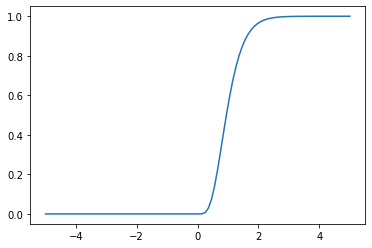

In [74]:
xs = np.linspace(-5, 5, 100)
ys = stats.ncf.cdf(xs, 12-1, (11*12)-12, 0) # f 누적분포, 0은 f분포를 그려달라는 뜻

_, axe = plt.subplots()
axe.plot(xs, ys)

1 - stats.ncf.cdf([1.4531390154496404], 12-1, (11*12)-12, 0)

In [76]:
#print(death_day) # ANOVA : 분산분석 (analysis of variance)
listb = [death_day[:, x] for x in range(12)]
print(stats.f_oneway(*listb))

# 2011 ~ 2021 야간 사망사고 평균은 월별 차이가 있다.

F_onewayResult(statistic=4.736555362643578, pvalue=5.194830576994146e-06)
